## 선형 회귀(Linear Regression) 예측 (ft.보스턴 주택 가격 예측)
- Scikit-learn 라이브러리를 이용해서 회귀 예측
- [시각화 matplot 홈페이지](https://matplotlib.org/stable/gallery/index.html)

In [39]:
import pandas as pd                                  # 데이터셋 다루기
import numpy as np
from sklearn.datasets import load_boston             # 보스턴 주택 가격 데이터셋 불러오기
from sklearn.model_selection import train_test_split # 데이터넷을 훈련 셋과 테스트 셋으로 나누기
from sklearn.linear_model import LinearRegression    # 선형 회귀 다루기
import matplotlib.pyplot as plt

### 01. 보스터 데이터셋 불러오기 > csv 로 저장하기

In [24]:
data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.to_csv('data/A01_보스턴_주택_가격_예측.csv', index=False)

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

### 02. 판다스 데이터 프레임으로 보기

In [25]:
hd = pd.read_table('data/A01_보스턴_테이블_구조.csv')  # 구분자: tab
df = pd.read_csv('data/tables/A01_보스턴_주택_가격_예측.csv') # 구분자: ,
display(hd)
df.head(2)

,CRIM,범죄율
0,ZN,"25,000평방 피트 당 주거용 토지의 비율"
1,INDUS,비소매(non-retail) 비즈니스 면적 비율
2,CHAS,"찰스 강 더미 변수 (통로가 하천을 향하면 1, 그렇지 않으면 0)"
3,NOX,산화 질소 농도 (천만 분의 일)
4,RM,주거 당 평균 객실 수
5,AGE,1940 년 이전에 건축된 자가 소유 점유 비율
6,DIS,5 개의 보스턴 고용 센터까지의 가중 거리
7,RAD,고속도로 접근성 지수
8,TAX,"10,000 달러 당 전체 가치 재산 세율"
9,PTRATIO,도시 별 학생-교사 비율


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


### 03. 훈련(Train) 셋과 테스트(Test) 셋으로 나누기

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels=['MEDV'], axis=1), df['MEDV'])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

### 04. 선형 회구(Linear Regrssion) 모델 학습 시키기

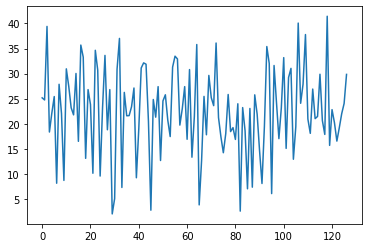

In [44]:
# LinearRegression 모델을 선정
model = LinearRegression(n_jobs = -1) #n_jobs = -1은 현재 컴퓨터의 CPU 코어를 모두 사용한다는 뜻
# 모델 학습
model.fit(x_train, y_train)
# 학습된 모델에 x_test 데이터 입력
pred = model.predict(x_test)

# plt.plot(y_train)
# plt.plot(x_train)
# plt.plot(x_test)
plt.plot(pred)

In [45]:
price = pd.Series([500, 1000, 2000, 4000], index =['2021-01-01', '2021-02-02', '2021-03-03', '2021-04-04'])
pd.DataFrame(price)

,0
2021-01-01,500
2021-02-02,1000
2021-03-03,2000
2021-04-04,4000
